### Importing Libraries 

In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from nltk.corpus import stopwords
from collections import defaultdict
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import warnings
warnings.filterwarnings("ignore")

### Loading Train & Test Data

In [36]:
train = pd.read_csv('train.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [37]:
test = pd.read_csv('test.csv')

test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [38]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


1. Train data contains 61 null 'keyword' and 2533 null 'location'.
2. Test data contains 26 null 'keyword' and 1105 null 'location'.
3. text feature is important feature because it is actual tweet.
4. We have to do EDA and Cleaning & Preprocessing on 'text' column.

### Checking Distribution of Target Variable 

In [41]:
disaster = train[train['target'] == 1].shape[0]
Not_disaster = train[train['target'] == 0].shape[0]

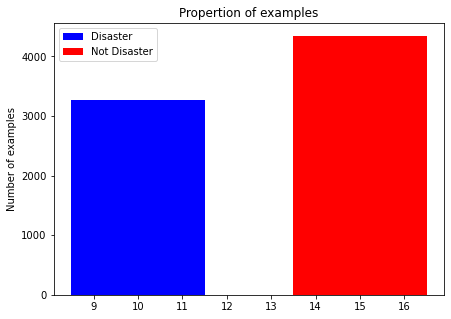

In [42]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,disaster,3, label="Disaster", color='blue')
plt.bar(15,Not_disaster,3, label="Not Disaster", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

1. By seeing plot of target variables count we can say that dataset is balanced. 

### Checking Number of Character in Tweets

In [43]:
def length(text):    
    return len(text)

In [44]:
train['length'] = train['text'].apply(length)

In [45]:
test['length'] = test['text'].apply(length)

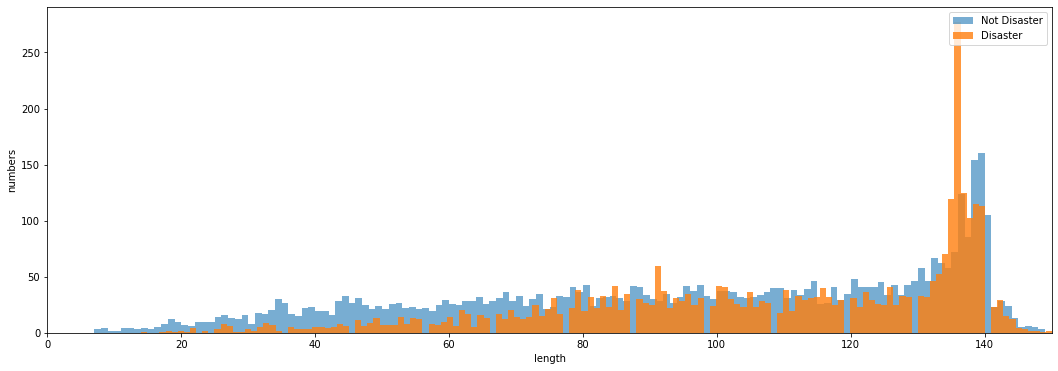

In [46]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train[train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not Disaster')
plt.hist(train[train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Disaster')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.show()

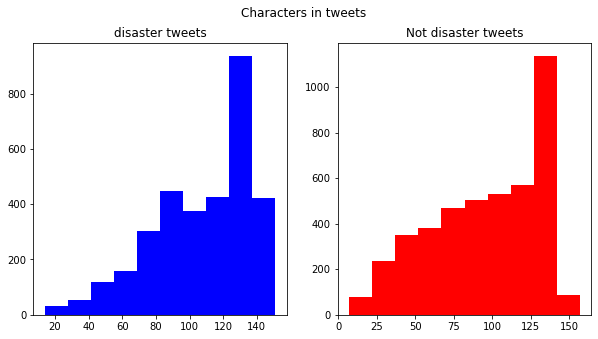

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')
tweet_len = train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

The distribution of both seems to be almost same.120 t0 140 characters in a tweet are the most common among both.

### Checking Number of Words in a Tweet 

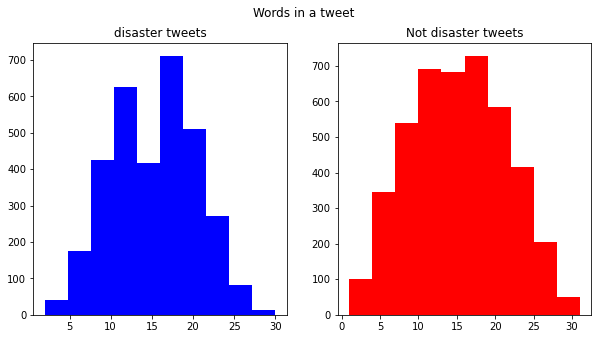

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

Most of the tweets have words between 10 to 25 for both the targests.

### Average Word Length in a Tweet 

Text(0.5, 0.98, 'Average word length in each tweet')

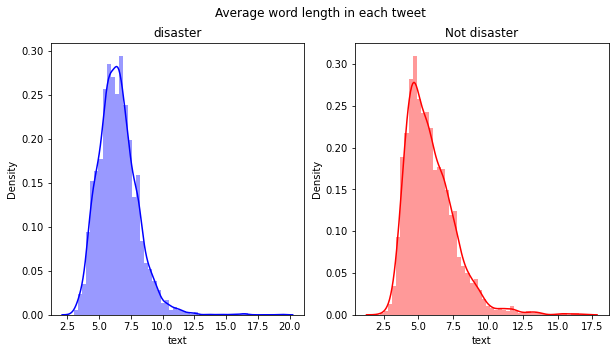

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

### Common StopWords in Tweets

In [50]:
stop = set(stopwords.words('english'))

def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

### For Target 0

In [51]:
corpus = create_corpus(0)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

<BarContainer object of 10 artists>

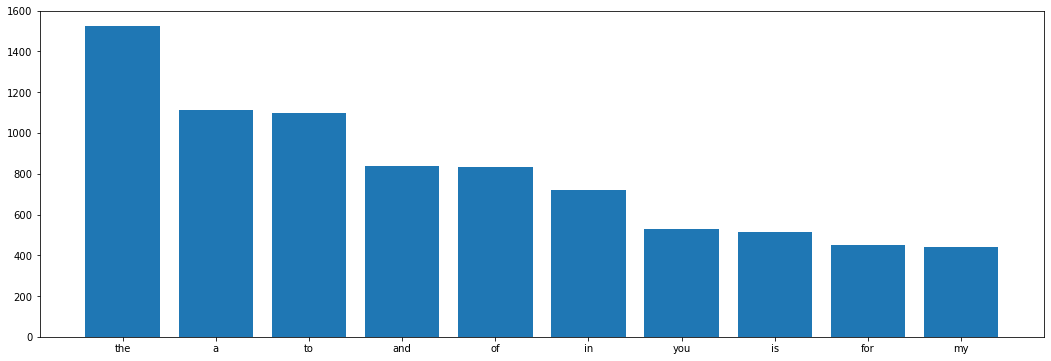

In [52]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

### For Target 1

<BarContainer object of 10 artists>

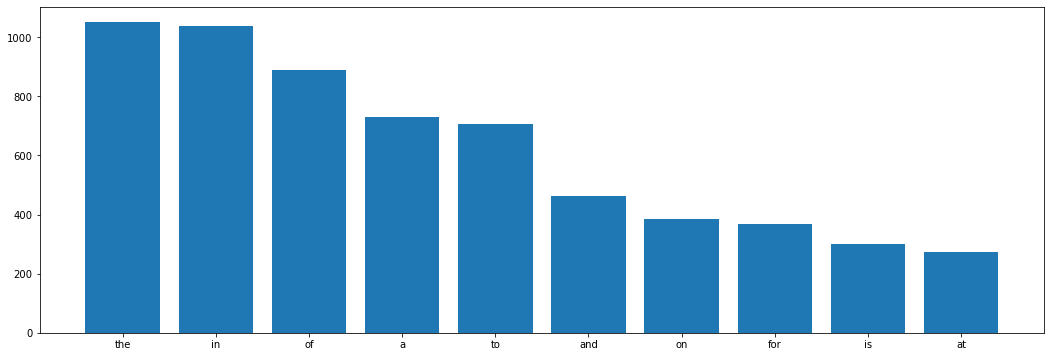

In [53]:
corpus=create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y = zip(*top)
plt.bar(x,y)

### Analyzing Punctuations 

### For Target 0

<BarContainer object of 20 artists>

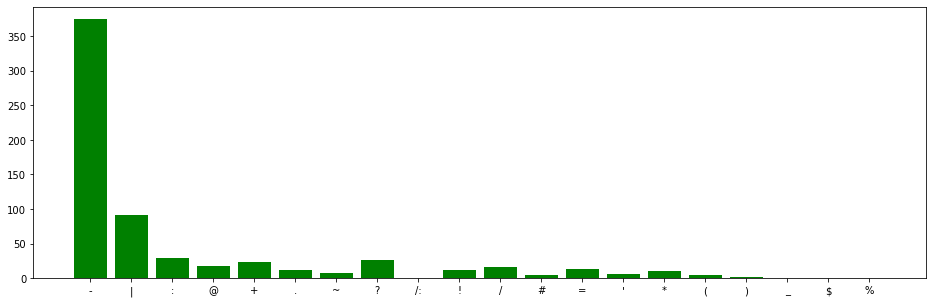

In [54]:
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

### For Target 1

<BarContainer object of 18 artists>

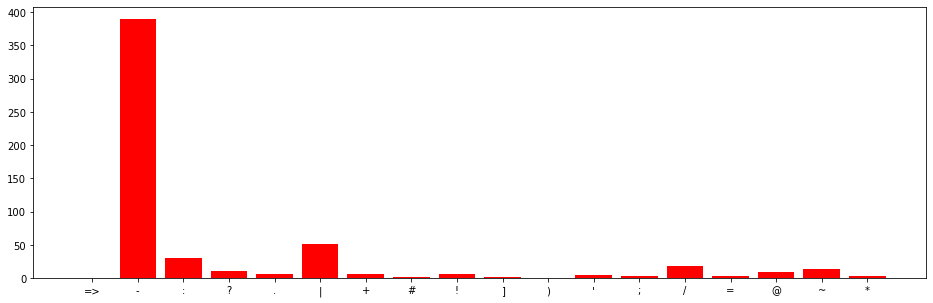

In [55]:
plt.figure(figsize=(16,5))
corpus = create_corpus(1)

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y, color = 'red')

### Most Comon Words 

In [56]:
corpus=[]
    
for x in train['text'].str.split():
    for i in x:
        corpus.append(i)

In [57]:
plt.figure(figsize=(16,5))
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<Figure size 1152x360 with 0 Axes>

<AxesSubplot:>

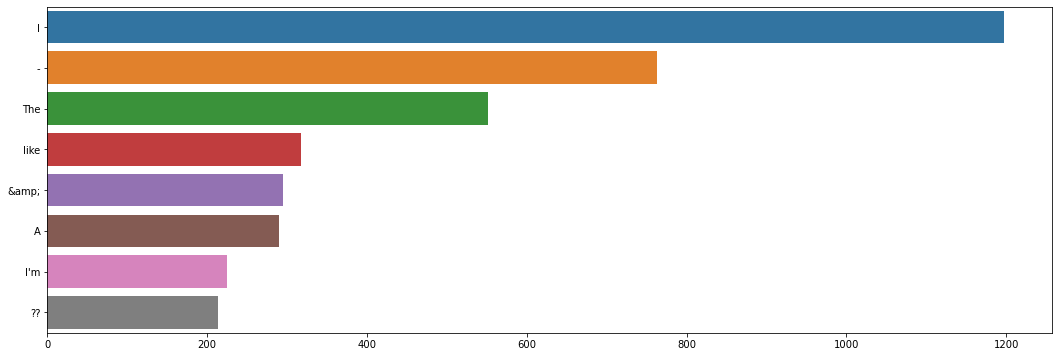

In [58]:
sns.barplot(x=y,y=x)

### N Grams 

will do it for bi grams n = 2

In [59]:
def get_top_tweet_bigrams(corpus, n = None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

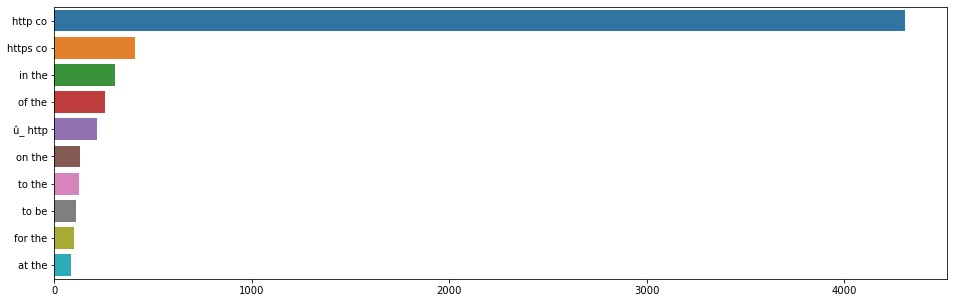

In [60]:
plt.figure(figsize=(16,5))
top_tweet_bigrams = get_top_tweet_bigrams(train['text'])[:10]
x,y = map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

### Analyzing Keyword Feature 

Total number of unique keywords

In [61]:
train['keyword'].nunique()

221

In [62]:
unique_keywords = train['keyword'].unique()

In [63]:
def keywords(target):
    kw=[]
    
    for k in train[train['target']==target]['keyword']:
        kw.append(k)
    return kw

### Top Keywords (Target 0)

<AxesSubplot:>

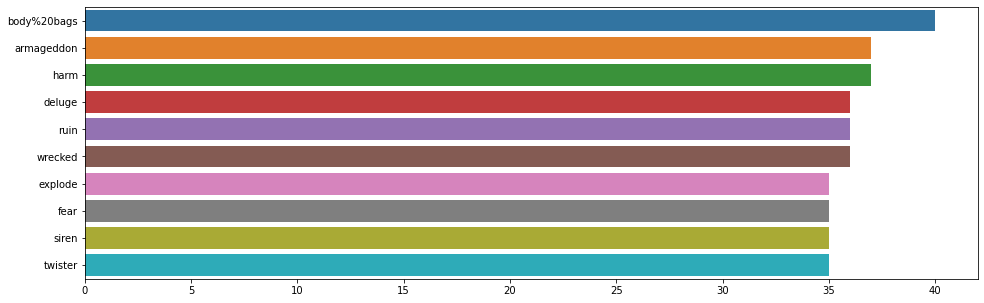

In [64]:
keyword = keywords(0)

counter = dict(Counter(keyword))
top = sorted(counter.items(), key = lambda kv: kv[1], reverse = True)[:10]

plt.figure(figsize=(16,5))
x,y = map(list,zip(*top))
sns.barplot(x=y, y=x)

### Top Keywords (Target 1)

<AxesSubplot:>

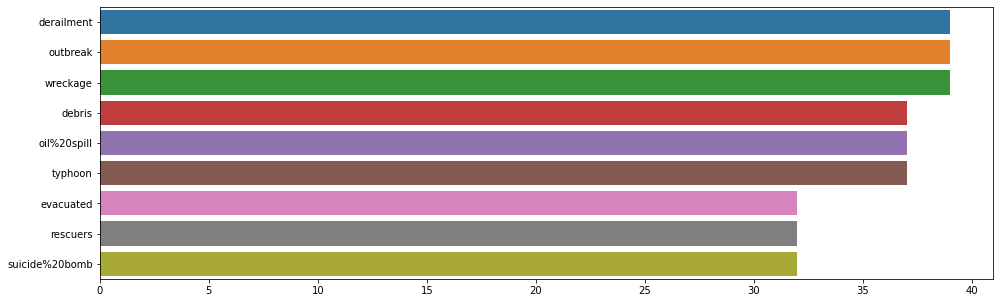

In [65]:
keyword = keywords(1)

counter = dict(Counter(keyword))
top = sorted(counter.items(), key = lambda kv: kv[1], reverse = True)[:10]

plt.figure(figsize=(16,5))
x,y = map(list,zip(*top))
sns.barplot(x=y, y=x)

### Top Locations Where Actually Disaster Happened 

In [66]:
def locations(target):
    loc=[]
    
    for l in train[train['target']==target]['location']:
        loc.append(l)
    return loc

<AxesSubplot:>

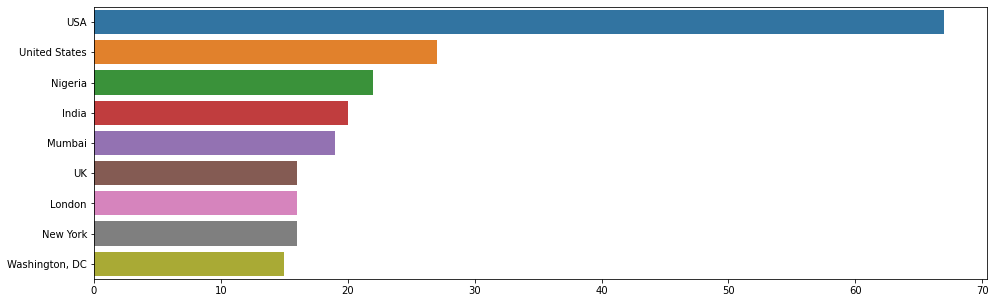

In [67]:
location = locations(1)

counter = dict(Counter(location))
top = sorted(counter.items(), key = lambda kv: kv[1], reverse = True)[:10]

plt.figure(figsize=(16,5))
x,y = map(list,zip(*top))
sns.barplot(x=y, y=x)

In [68]:
train.to_csv('train_eda.csv', index = False)
test.to_csv('test_eda.csv', index = False)

## EDA Summary 

###### 1. In train and test datasets 'Location' & 'Keyword' features have lots of NaN values.
###### 2. Train dataset well balanced with respect to class labels.
###### 3. Most of the tweets have characters between 120 to 140.
###### 4. Most of the tweets have words between 10 to 25 for both the targests.
###### 5. Tweets contains common stopwords and punctuations we have to remove them while cleaning.
###### 6. Most of the tweets have URL's need to clean them.
###### 7. There are 221 unique keywords are there in train data.
###### 8. Most of the actual disater tweeted from USA followed by Nigeria and India.